## Plotting Steronets

Thanks to https://github.com/joferkington/mplstereonet

See https://nbviewer.jupyter.org/github/ondrolexa/apsg/blob/master/examples/apsg_tutorial.ipynb for an alternative with other nice things...

or http://geopytool.com/installation-expert.html for this plus some geochem plots

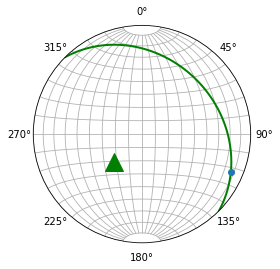

In [1]:
import matplotlib.pyplot as plt
import mplstereonet
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')

strike, dip = 315, 30
ax.plane(strike, dip, 'g-', linewidth=2)
ax.pole(strike, dip, 'g^', markersize=18)
ax.rake(strike, dip, -25)
ax.grid()

plt.show()

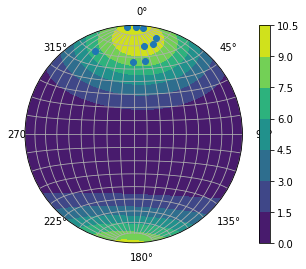

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import mplstereonet

fig, ax = mplstereonet.subplots()

strike, dip = 90, 80
num = 10
strikes = strike + 10 * np.random.randn(num)
dips = dip + 10 * np.random.randn(num)

cax = ax.density_contourf(strikes, dips, measurement='poles')

ax.pole(strikes, dips)
ax.grid(True)
fig.colorbar(cax)

plt.show()

In [3]:
"""
Basic quadrant, strike/dip, and rake parsing.
`mplstereonet` expects measurements to follow the
"right-hand-rule" (RHR) to indicate dip direction.
If you have a set of measurements that don't necessarily follow the RHR, there
are a number of parsing and standardization functions in `mplstereonet` to
correct for this.
"""
import mplstereonet

print('Parse quadrant azimuth measurements')
for original in ['N30E', 'E30N', 'W10S', 'N 10 W']:
    azi = mplstereonet.parse_quadrant_measurement(original)
    print('"{}" --> {:.1f}'.format(original, azi))

print('\nParse quadrant strike/dip measurements.')
print('Note that the output follows the right-hand-rule.')

def parse_sd(original, seperator):
    strike, dip = mplstereonet.parse_strike_dip(*original.split(seperator))
    print('"{}" --> Strike: {:.1f}, Dip: {:.1f}'.format(original, strike, dip))

parse_sd('215/10', '/')
parse_sd('215/10E', '/')
parse_sd('215/10NW', '/')
parse_sd('N30E/45NW', '/')
parse_sd('E10N\t20 N', '\t')
parse_sd('W30N/46.7 S', '/')

print("\nSimilarly, you can parse rake measurements that don't follow the RHR.")

def split_rake(original, sep1=None, sep2=None):
    components = original.split(sep1)
    if len(components) == 3:
        return components
    strike, rest = components
    dip, rake = rest.split(sep2)
    return strike, dip, rake

def display_rake(original, sep1, sep2=None):
    components = split_rake(original, sep1, sep2)
    strike, dip, rake = mplstereonet.parse_rake(*components)
    template = '"{}" --> Strike: {:.1f}, Dip: {:.1f}, Rake: {:.1f}'
    print(template.format(original, strike, dip, rake))

original = 'N30E/45NW 10NE'
display_rake(original, '/')

original = '210 45\t30N'
display_rake(original, None)

original = 'N30E/45NW raking 10SW'
display_rake(original, '/', 'raking')

Parse quadrant azimuth measurements
"N30E" --> 30.0
"E30N" --> 60.0
"W10S" --> 260.0
"N 10 W" --> 350.0

Parse quadrant strike/dip measurements.
Note that the output follows the right-hand-rule.
"215/10" --> Strike: 215.0, Dip: 10.0
"215/10E" --> Strike: 35.0, Dip: 10.0
"215/10NW" --> Strike: 215.0, Dip: 10.0
"N30E/45NW" --> Strike: 210.0, Dip: 45.0
"E10N	20 N" --> Strike: 260.0, Dip: 20.0
"W30N/46.7 S" --> Strike: 120.0, Dip: 46.7

Similarly, you can parse rake measurements that don't follow the RHR.
"N30E/45NW 10NE" --> Strike: 210.0, Dip: 45.0, Rake: 170.0
"210 45	30N" --> Strike: 210.0, Dip: 45.0, Rake: 150.0
"N30E/45NW raking 10SW" --> Strike: 210.0, Dip: 45.0, Rake: 10.0
